In [64]:
import os 
import glob
from pathlib import Path
import pandas as pd 
import numpy as np 
import nibabel as nib 
import json

In [65]:
gbm_patients = os.listdir('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti')

In [66]:
lgg_patients = os.listdir('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti')

## We need to map the segmentations that are seemingly randomly named from one of the T1, T2, T2-FLAIR or T1C nifti images that were fed to the algorithm

In [67]:
series_folders_with_segs = os.listdir('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip')

In [68]:
patient = gbm_patients[0]

In [69]:
root_dir = "/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti"

In [70]:
# [x.split('/')[-1] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [71]:
glob.glob(root_dir+"/"+patient+"/*/*")

['/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-06-0210/08-17-1995-19584/1-SAG_LOCAL-29333.nii.gz',
 '/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-06-0210/08-17-1995-19584/3-AXIAL_T1-88865.nii.gz',
 '/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-06-0210/08-17-1995-19584/2-AXIAL_T2-83081.nii.gz',
 '/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-06-0210/08-17-1995-19584/4-AXIAL_T1_POST_GD-64939.nii.gz']

In [72]:
gbm_patientID_to_seriesID = {}
for patient in gbm_patients: 
    gbm_patientID_to_seriesID[patient] = [x.split('/')[-1].split('.')[0:-2][0] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [73]:
root_dir = "/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti"

In [74]:
lgg_patientID_to_seriesID = {}
for patient in lgg_patients: 
    lgg_patientID_to_seriesID[patient] = [x.split('/')[-1].split('.')[0:-2][0] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [75]:
# gbm_patientID_to_seriesID

In [76]:
mapping_dict = {}

In [77]:
for idx, i in enumerate(series_folders_with_segs): 
    for key, value in gbm_patientID_to_seriesID.items(): 
        if i in value: 
#             print(idx, i, key)
            mapping_dict[i] = key

In [78]:
for idx, i in enumerate(series_folders_with_segs): 
    for key, value in lgg_patientID_to_seriesID.items(): 
        if i in value: 
#             print(idx, i, key)
            mapping_dict[i] = key

In [79]:
mapping_dict

{'10-AX_T1_POST_GD_FLAIR-95256a_n': 'TCGA-06-0241',
 '9-AX_T1_POST_GD_FLAIR-32350a_n': 'TCGA-06-0171',
 '15-Ax_SE_T1_Post-42502a_n': 'TCGA-02-0087',
 '6-AX_T1_POST-52648a_n': 'TCGA-02-0116',
 '11-AX_T1_POST_GD_FLAIR-15818a_n': 'TCGA-06-2570',
 '6-AX_T1_POST-64479a_n': 'TCGA-02-0037',
 '8-Ax_T1_2': 'TCGA-DU-5851',
 '8-AXIAL_T1_GD-71120a_n': 'TCGA-06-0127',
 '10-AX_T1_POST_GD_FLAIR-80095a_n': 'TCGA-06-0881',
 '13-AxT1-thin_for_surgery-12089a_n': 'TCGA-06-0182',
 '6-3D_SPGR_AX-79240a_n': 'TCGA-08-0521',
 '12-AX_T1_POST_GD_FLAIR-37089a_n': 'TCGA-06-0138',
 '10-3d_T1_FSPGR__CONT-32567a_n': 'TCGA-08-0389',
 '801-brain_with_AX_T1_POST-26488a_n': 'TCGA-14-1395',
 '901-BRAIN_WWO_T1_POST-50983a_n': 'TCGA-14-0813',
 '10-AX_T1_POST_GD_FLAIR-65253a_n': 'TCGA-06-0644',
 '12-AX_T1_POST_GD_FLAIR-61610a_n': 'TCGA-06-1802',
 '2-Ax_T1_SE-18545a_n': 'TCGA-14-1459',
 '2-ax_t1_c-85616a_n': 'TCGA-12-1093',
 '9-AxT1-thin_for_surgery-27598a_n': 'TCGA-06-0240',
 '9-AXIAL_T1_GD-34814a_n': 'TCGA-06-0176',
 '12-Ax

In [80]:
len(mapping_dict.keys())

194

In [81]:
with open('segmentation_mapping.json', 'w') as fp:
    json.dump(mapping_dict, fp)

## Now just quickly visually spot checking a few of the segmentations to see if they are correct: 

In [19]:
## Let's investigate just a few of them to ensure that they are correct: 
import nibabel as nib
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

### TCGA-06-0241

In [21]:
t2all_vol = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/10-AX_T1_POST_GD_FLAIR-95256a_n/10-AX_T1_POST_GD_FLAIR-95256a_n_WT.nii.gz')
cel_vol = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/10-AX_T1_POST_GD_FLAIR-95256a_n/10-AX_T1_POST_GD_FLAIR-95256a_n_ET.nii.gz')
t1c_vol = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-06-0241/08-30-2005-93299/10-AX_T1_POST_GD_FLAIR-95256a_n.nii.gz')
fla_vol = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-06-0241/08-30-2005-93299/5-AXIAL_FLAIR-99930a_n.nii.gz')


In [22]:
t1c_vol = np.array(t1c_vol.dataobj)
fla_vol = np.array(fla_vol.dataobj)
t2all_vol = np.array(t2all_vol.dataobj)
cel_vol = np.array(cel_vol.dataobj)

In [23]:
np.where(t2all_vol > 0.5)

(array([148, 148, 148, ..., 187, 187, 187]),
 array([138, 139, 139, ..., 137, 137, 137]),
 array([92, 91, 92, ..., 79, 80, 81]))

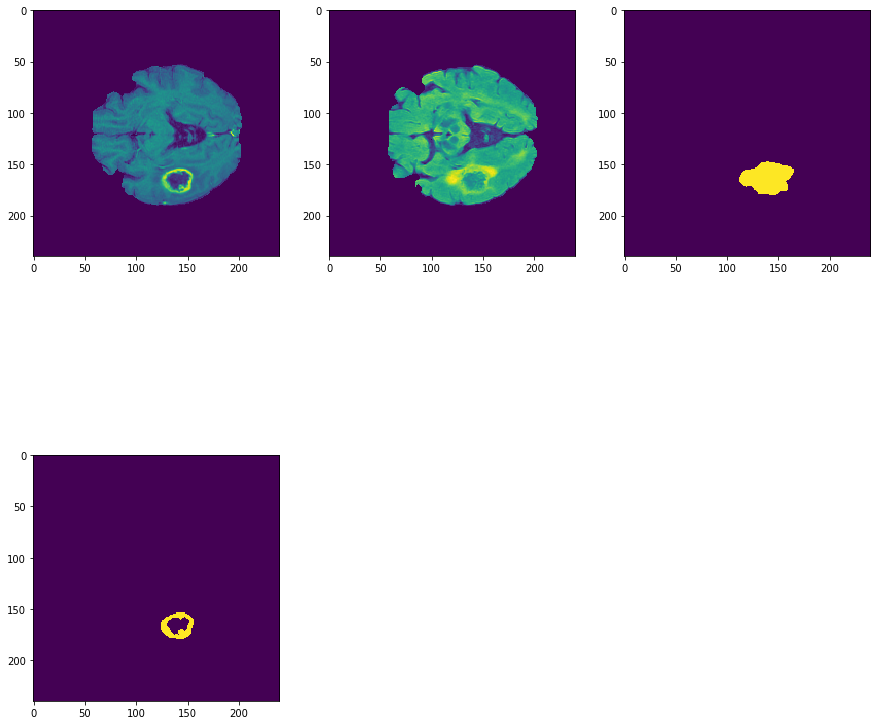

In [24]:
x =92
fig = plt.figure(figsize = (15, 15))
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(t1c_vol[:,:,x])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(fla_vol[:,:,x])
# ax3 = fig.add_subplot(2,3,3)
# ax3.imshow(adc_vol[:,:,x])
ax4 = fig.add_subplot(2,3,3)
ax4.imshow(t2all_vol[:,:,x])
ax4 = fig.add_subplot(2,3,4)
ax4.imshow(cel_vol[:,:,x])


### TCGA-76-6664

Chosen Randomly, maps to `1401-T1_SAG_POST-07378a`


In [25]:
import json

In [26]:
## Read in datalist json

with open('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/config/config_datalist_stripped.json') as json_file:
    datalist = json.load(json_file)
    

In [27]:
datalist

{'validation': [{'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/11-AX_T1_POST_GD_FLAIR-81300a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/8-AX_T1_pre_gd-14019a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/7-AX_T2_FR-FSE_RF2_150-55295a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/6-AXIAL_FLAIR-84159a_n.nii.gz']},
  {'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/1001-T1_SE_POST-94212a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/301-T1_SAG_SE-41348a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/501-T2-WHOLE_BRAIN-32557a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/401-T2_AX_FLAIR-72445a_n.nii.gz']},
  {'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-FG-A6J1/04-23-2004-NR_MRI_BRAIN_WWO-08141/

In [28]:
t1ca_76_6664 = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-76-6664//01-10-2002-MRI_BRAIN_per_R-81790/1401-T1_SAG_POST-07378a_n.nii.gz')

In [29]:
fla_76_6664 = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-76-6664/01-10-2002-MRI_BRAIN_per_R-81790/601-T2_AX_FLAIR-75280a_n.nii.gz')

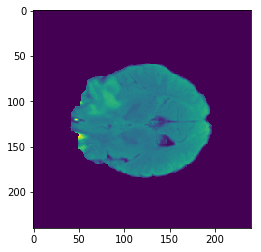

In [30]:
plt.imshow(fla_76_6664.dataobj[:,:,75])

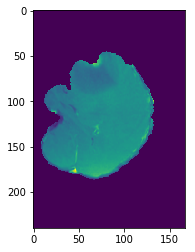

In [31]:
plt.imshow(t1ca_76_6664.dataobj[100,:,:])

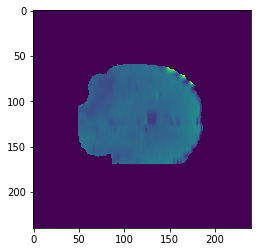

In [40]:
plt.imshow(t1ca_76_6664.dataobj[:,:,60])

In [41]:
## read in the segmentation of the whole tumor of this one: 
seg_WT_76_6664 = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/1401-T1_SAG_POST-07378a_n/1401-T1_SAG_POST-07378a_n_WT.nii.gz')

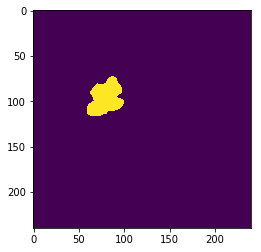

In [44]:
plt.imshow(seg_WT_76_6664.dataobj[:,:,75])

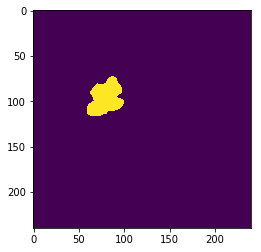

In [45]:
plt.imshow(seg_WT_76_6664.dataobj[:,:,75])

In [46]:
## read in the segmentation of the whole tumor of this one: 
seg_ET_76_6664 = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/1401-T1_SAG_POST-07378a_n/1401-T1_SAG_POST-07378a_n_ET.nii.gz')

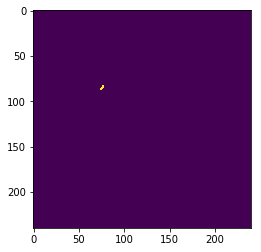

In [47]:
plt.imshow(seg_ET_76_6664.dataobj[:,:,75])

### TCGA-DU_5853

Chosen Randomly, maps to `11-AX_T1_POST_GD_FLAIR-81300a_n`


In [48]:
t1ca_DU_5853 = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/11-AX_T1_POST_GD_FLAIR-81300a_n.nii.gz')

In [49]:
fla_DU_5853 = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/6-AXIAL_FLAIR-84159a_n.nii.gz')

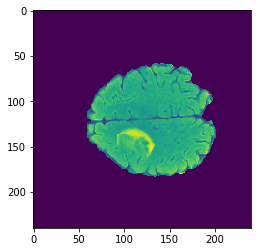

In [59]:
plt.imshow(fla_DU_5853.dataobj[:,:,130])

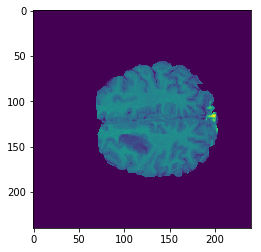

In [63]:
plt.imshow(t1ca_DU_5853.dataobj[:,:,125])

In [52]:
## read in the segmentation of the whole tumor of this one: 
seg_WT_DU_5853 = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/11-AX_T1_POST_GD_FLAIR-81300a_n/11-AX_T1_POST_GD_FLAIR-81300a_n_WT.nii.gz')

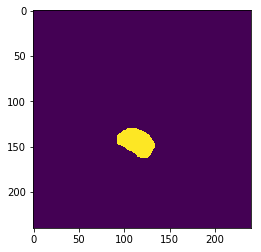

In [58]:
plt.imshow(seg_WT_DU_5853.dataobj[:,:,130])

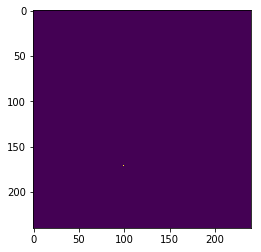

In [54]:
plt.imshow(seg_WT_DU_5853.dataobj[:,:,75])

In [55]:
## read in the segmentation of the whole tumor of this one: 
seg_ET_DU_5853 = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/1401-T1_SAG_POST-07378a_n/1401-T1_SAG_POST-07378a_n_ET.nii.gz')

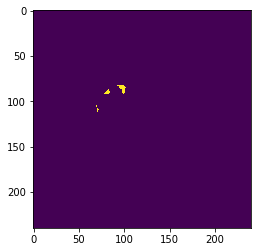

In [62]:
plt.imshow(seg_ET_DU_5853.dataobj[:,:,120])